In [1]:
import os
import pandas as pd
import seaborn as sns
import re
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [2]:


BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '../data')
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))

In [3]:
# 데이터 확인
print(df.head(10))

                    ID                              text  target
0  ynat-v1_train_00000  정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보       4
1  ynat-v1_train_00001       K찰.국DLwo 로L3한N% 회장 2 T0&}송=       3
2  ynat-v1_train_00002            m 김정) 자주통일 새,?r열1나가야1보       2
3  ynat-v1_train_00003     갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩       5
4  ynat-v1_train_00004      pI美대선I앞두고 R2fr단 발] $비해 감시 강화       6
5  ynat-v1_train_00005    美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다       0
6  ynat-v1_train_00006             프로야구~롯TKIAs광주 경기 y천취소       1
7  ynat-v1_train_00007  아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...       4
8  ynat-v1_train_00008    朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합       6
9  ynat-v1_train_00009        듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감       4


In [4]:
df.describe()

,target
count,2800.000000
mean,3.010714
std,2.003719
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2800 non-null   object
 1   text    2800 non-null   object
 2   target  2800 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.8+ KB


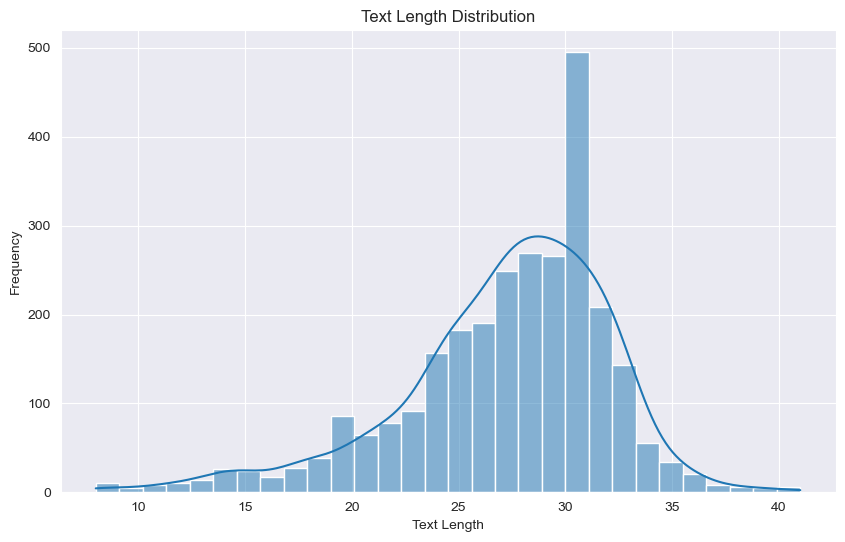

In [6]:
# 1. 텍스트 길이 분포
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

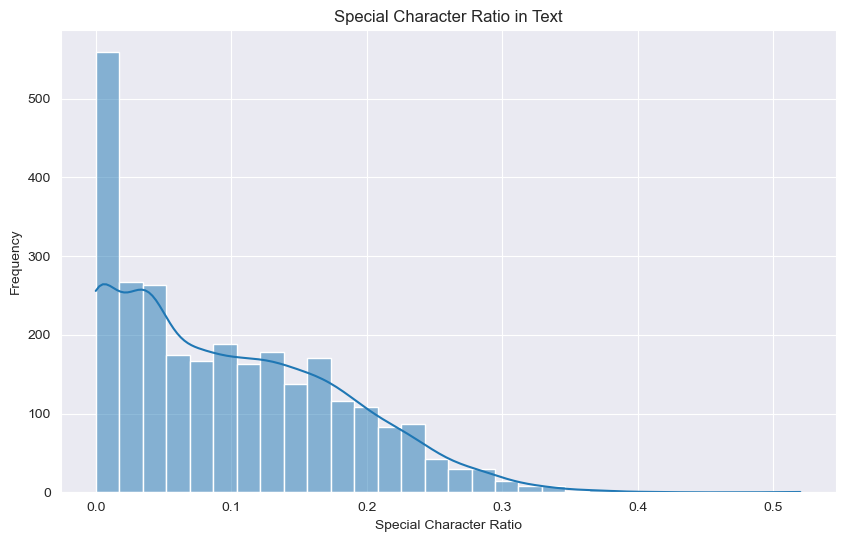

In [7]:
# 2. 텍스트 내 특수문자 비율
def calculate_special_char_ratio(text):
    special_chars = re.findall(r'[^a-zA-Z가-힣0-9\s]', text)  # 한글 및 숫자 제외
    return len(special_chars) / len(text) if len(text) > 0 else 0

df['special_char_ratio'] = df['text'].apply(calculate_special_char_ratio)

plt.figure(figsize=(10, 6))
sns.histplot(df['special_char_ratio'], bins=30, kde=True)
plt.title('Special Character Ratio in Text')
plt.xlabel('Special Character Ratio')
plt.ylabel('Frequency')
plt.show()


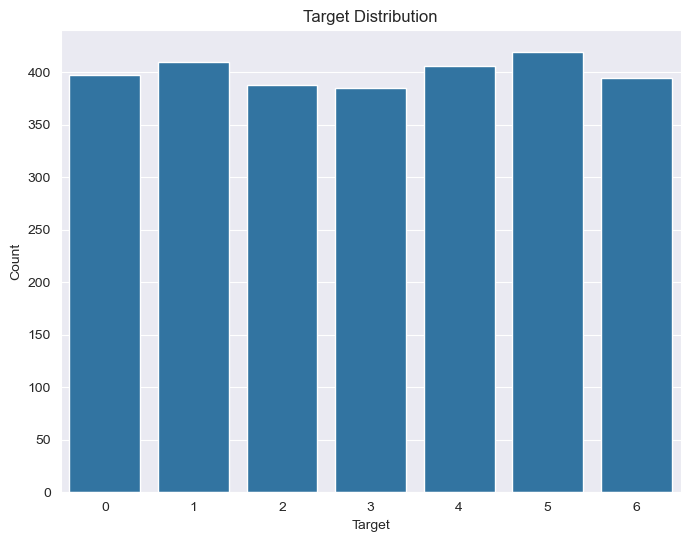

In [8]:

# 3. Target 분포
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()